In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images',
    target_size=(512, 512),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images', # same directory as training data
    target_size=(512, 512),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(512, 512, 3))

Found 5121 images belonging to 3 classes.
Found 1278 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import resnet50

In [ ]:
RESNET_50_MODEL = Sequential()

resnet50_model = keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(512,512,3),classes=3, pooling='avg'
)

In [ ]:
# we run this command to prevent the resnet model from re-learning the parameters again, this saves on time
for layer in resnet50_model.layers:
    layer.trainable = False 

In [ ]:
RESNET_50_MODEL.add(resnet50_model)
RESNET_50_MODEL.add(Flatten())
RESNET_50_MODEL.add(Dense(512,activation='relu'))
RESNET_50_MODEL.add(Dense(3, activation='softmax'))

In [ ]:
RESNET_50_MODEL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
RESNET_50_MODEL.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
graph = RESNET_50_MODEL.fit(train_generator, epochs=25, validation_data = validation_generator)

graph

Epoch 1/25
161/161 [==============================] - 1739s 11s/step - loss: 1.4523 - accuracy: 0.3579 - val_loss: 1.2938 - val_accuracy: 0.3858
Epoch 2/25
161/161 [==============================] - 1771s 11s/step - loss: 1.1417 - accuracy: 0.3923 - val_loss: 1.0612 - val_accuracy: 0.4437
Epoch 3/25
161/161 [==============================] - 1780s 11s/step - loss: 1.1257 - accuracy: 0.3999 - val_loss: 1.0493 - val_accuracy: 0.4679
Epoch 4/25
161/161 [==============================] - 1743s 11s/step - loss: 1.1275 - accuracy: 0.4003 - val_loss: 1.0607 - val_accuracy: 0.3858
Epoch 5/25
161/161 [==============================] - 1774s 11s/step - loss: 1.0579 - accuracy: 0.4442 - val_loss: 1.1336 - val_accuracy: 0.3858
Epoch 6/25
161/161 [==============================] - 1778s 11s/step - loss: 1.0555 - accuracy: 0.4796 - val_loss: 1.0293 - val_accuracy: 0.5642
Epoch 7/25
161/161 [==============================] - 1794s 11s/step - loss: 1.0643 - accuracy: 0.4374 - val_loss: 1.0724 - val_ac

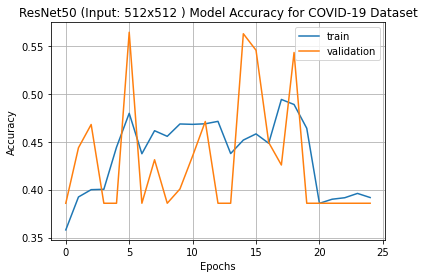

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('ResNet50 (Input: 512x512 ) Model Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using ResNet50 with input 512x512 is',max_acc*100)

The highest accuracy achieved using ResNet50 with input 512x512 is 56.41627311706543
